![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE SEA SURFACE TEMPERATURE TRAINING

<div style="text-align: right"><i> MarineData4America </i></div>

***
<center><h1>How to visualise maps and time series of Sea Surface Temperature (SST)</h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>

***
# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Initial set up](#2.-Initial-set-up)
    - [2.1. Required Python version](#2.1.-Required-Python-version)
    - [2.2. Required modules](#2.2.-Required-modules)
    - [2.3. Create input and output directories](#2.3.-Create-input-and-output-directories)
- [3. Data](#3.-Data)
    - [3.1. First example](#3.1.-First-example)
        - [3.1.1. Product description](#3.1.1.-Product-description)
        - [3.1.2. Get more information on the product](#3.1.2.-Get-more-information-on-the-product)
        - [3.1.3. Parameters needed for downloading the data used in the exercise](#3.1.3.-Parameters-needed-for-downloading-the-data-used-in-the-exercise)
    - [3.2. Second example](#3.2.-Second-example)
        - [3.2.1. Product description](#3.2.1.-Product-description)
        - [3.2.2. Get more information on the product](#3.2.2.-Get-more-information-on-the-product)
        - [3.2.3. Parameters needed for downloading the data used in the exercise](#3.2.3.-Parameters-needed-for-downloading-the-data-used-in-the-exercise)
    - [3.3. Downloading data with motuclient](#3.3.-Downloading-data-with-motuclient)
        - [3.3.1. Download motuclient](#3.3.1.-Download-motuclient)
        - [3.3.2. First example](#3.3.2.-First-example) 
- [4. Exercises](#4.-Exercises)
    - [4.1 Exercise 1: map plotting](#4.1-Exercise-1:-map-plotting)
        - [4.1.1. Import the modules and get set up](#4.1.1.-Import-the-modules-and-get-set-up)
        - [4.1.2. Access the data](#4.1.2.-Access-the-data)
        - [4.1.3. Set the configuration](#4.1.3.-Set-the-configuration)
        - [4.1.4. Plot the variables](#4.1.4.-Plot-the-variables)
    - [4.2. Exercise 2: Plot of time series](#4.2.-Exercise-2:-Plot-of-time-series)
        - [4.2.1. Import the modules and get set up](#4.2.1.-Import-the-modules-and-get-set-up)
        - [4.2.2. Access the data](#4.2.2.-Access-the-data)
        - [4.2.3. Set the configuration](#4.2.3.-Set-the-configuration)
        - [4.2.4. Plot the time series](#4.2.4.-Plot-the-time-series)
- [5. Conclusion](#5.-Conclusion)
***

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

This python notebook contains two examples of visualisation of the Sea Surface Temperature (SST) products for the global ocean.

The first example will show how to plot a map of Sea Surface Temperature data using near-real-time daily SST data.

The second example will show how to make a plot of the diurnal cycle of values of Sea Surface Temperature in two different locations (and of their monthly average) as obtained from a different near-real-time product.

# 2. Initial set up
[Go back to the "Table of contents"](#Table-of-contents)

This section includes some steps that need to be taken before getting on with the exercises.

### Remember: Code cells allow you to enter and run code
Run a code cell using <code>Shift-Enter</code> or by pressing the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button in the toolbar above. The code is normally run in a Python environment, but if there is an exclamation mark (!) at the beginning, the code is executed in the shell instead.

## 2.1. Required Python version
[Go back to the "Table of contents"](#Table-of-contents)

The required version of Python is 3.7. Check your python version with:

In [1]:
!python --version

Python 3.7.3


If needed, you can install the right Python version in this way:
```
conda install python=3.7
```

## 2.2. Required modules
[Go back to the "Table of contents"](#Table-of-contents)

| Module name | Description |
| :--- | :---|
| **os** | [ Miscellaneous operating system interfaces](https://docs.python.org/3.7/library/os.html) for managing paths, creating directories,... |
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** | [Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |
| **basemap** | [The matplotlib basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps in Python |
| **datetime** | [The datetime module](https://docs.python.org/3.8/library/datetime.html) supplies classes for manipulating dates and times in both simple and complex ways |
| **pandas** | [pandas](https://pandas.pydata.org/) is a library providing high-performance, easy-to-use data structures and data analysis tools for Python |
| **netcdf4** | [The netcdf4 module](https://unidata.github.io/netcdf4-python/) provides a Python interface for handling netCDF4 files |
| **proj4** | [proj4](https://pypi.org/project/pyproj/) provides an interface to a software library that handles cartographic projections |
| **cftime** | [cftime](https://pypi.org/project/cftime/) provides functionality for handling times |

### Install the needed Python modules (for local installation, can be skipped during Training)

If you are using the standard *Anaconda* installation, you can install the modules by executing the following command in a new cell. A specific version of matplotlib (version 3.2) is specified to avoid an issue with compatibility with the basemap module.

In [3]:

#conda install numpy xarray matplotlib=3.2 basemap netcdf4 proj4 basemap-data-hires cftime


Then, as requested, please restart the kernel.

The kernel maintains the state of a notebook's computations. You can reset this state by restarting the kernel. This is done by clicking on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> in the toolbar above.

## 2.3. Create input and output directories
[Go back to the "Table of contents"](#Table-of-contents)

Two directories will be needed: one for storing data and one for the created output. These are created using the **checkDir** function and code below. By default these directories are called 'data' and 'out'. Different names can be used, but the code in the examples in [section 4](#4.-Exercises) will need to be changed to match.

In [7]:
import os
def checkDir(outPath):
    if not os.path.exists(outPath):
        os.makedirs(outPath)
        
# Create the data directory if necessary:
#checkDir('data')

# Create the output directory if necessary:
#checkDir('out')

# 3. Data
[Go back to the "Table of contents"](#Table-of-contents)

Level 4 (L4) Sea Surface Temperature (SST) datasets covering the global ocean are operationally produced and distributed both as near-real time and reprocessed products by the Met Office. Two examples of the data will be downloaded for use in the exercises. 

Sections 3.1 and 3.2 describe the data that are needed. Examples of how to download these data are given in [section 3.3.](#3.3.-Downloading-data-with-motuclient)

## 3.1. First example

### 3.1.1. Product description
[Go back to the "Table of contents"](#Table-of-contents)

### The first example is based on the product: [SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001)

The SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 product consists of level 4 (L4) merged-multisensor SST data with data gaps infilled. It covers the global ocean and is provided on a 0.05° regular grid. It is representative of foundation SST, which is the SST from which the diurnal cycle grows (see the [Group for High Resolution SST (GHRSST) information page on data levels and types of SST](https://www.ghrsst.org/ghrsst-data-services/products/)). Sea ice concentrations are also available in the data files. In addition to daily SST data, monthly and seasonal averages, daily anomalies, and estimates of bias in SST satellite sensor data are available on a 0.25° grid.

Reference: <i>Good, S.; Fiedler, E.; Mao, C.; Martin, M.J.; Maycock, A.; Reid, R.; Roberts-Jones, J.; Searle, T.; Waters, J.; While, J.; Worsfold, M. The Current Configuration of the OSTIA System for Operational Production of Foundation Sea Surface Temperature and Ice Concentration Analyses. Remote Sens. 2020, 12, 720. [doi:10.3390/rs12040720](https://doi.org/10.3390/rs12040720)</i>

### 3.1.2. Get more information on the product
[Go back to the "Table of contents"](#Table-of-contents)

1. You can find information on this product and access to the download services in the [dedicated Product Page on Copernicus Marine (CMEMS) Web portal](https://resources.marine.copernicus.eu/?option=com_csw&task=results?option=com_csw&view=details&product_id=SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001)
<br>
2. For **detailed information** about the product, please consult the **document**: [Product User Manual (PUM)](http://marine.copernicus.eu/documents/PUM/CMEMS-SST-PUM-010-001.pdf)
<br>
3. For information about **the quality and validation** of the product, please consult the **document**: [Quality Information Document (QUID)](http://marine.copernicus.eu/documents/QUID/CMEMS-SST-QUID-010-001.pdf)

### 3.1.3. Parameters needed for downloading the data used in the exercise
[Go back to the "Table of contents"](#Table-of-contents)

| Parameter | Value |
| :--- | :---|
| **Product** | SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 |
| **Dataset** | METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2 |
| **Frequency** | daily |
| **Lat min** | -90.0 |
| **Lat max** | 90.0  |
| **Lon min** | -180.0 |
| **Lon max** | -20.0 |
| **Timesteps** | from  2021-03-15T00:00 to 2021-03-16T00:00 |
| **Variables** | analysed_sst, analysis_error, sea_ice_fraction, mask | 
| **Service for downloading** | SUBSETTER |

***

## 3.2. Second example
[Go back to the "Table of contents"](#Table-of-contents)

### 3.2.1. Product description
### The second example is based on the product: [SST_GLO_SST_L4_NRT_OBSERVATIONS_010_014](https://resources.marine.copernicus.eu/?option=com_csw&task=results?option=com_csw&view=details&product_id=SST_GLO_SST_L4_NRT_OBSERVATIONS_010_014)

The SST_GLO_SST_L4_NRT_OBSERVATIONS_010_014 product provides hourly average gap-free SST maps (L4) at high 0.25° grid resolution for the global ocean. The data are provided daily in near-real-time. The product is created by combining output from diurnal cycle models with estimates of the diurnal signal estimated from satellite data. 

Reference: <i>While, J., Mao, C., Martin, M.J., Roberts‐Jones, J., Sykes, P.A., Good, S.A. and McLaren, A.J. (2017), An operational analysis system for the global diurnal cycle of sea surface temperature: implementation and validation. Q.J.R. Meteorol. Soc., 143: 1787-1803. [doi:10.1002/qj.3036](https://doi.org/10.1002/qj.3036)</i>


### 3.2.2. Get more information on the product
[Go back to the "Table of contents"](#Table-of-contents)

1. You can find info on this product and access to the download services in the [dedicated Product Page on Copernicus Marine (CMEMS) Web portal](https://resources.marine.copernicus.eu/?option=com_csw&task=results?option=com_csw&view=details&product_id=SST_GLO_SST_L4_NRT_OBSERVATIONS_010_014)
<br>
2. For **detailed information** about the product, please consult the **document**: [Product User Manual (PUM)](http://marine.copernicus.eu/documents/PUM/CMEMS-SST-PUM-010-014.pdf)
<br>
3. For information about **the quality and validation** of the product, please consult the **document**: [Quality Information Document (QUID)](http://marine.copernicus.eu/documents/QUID/CMEMS-SST-QUID-010-014.pdf)

### 3.2.3. Parameters needed for downloading the data used in the exercise
[Go back to the "Table of contents"](#Table-of-contents)

| Parameter | Value |
| :--- | :---|
| **Product** | SST_GLO_SST_L4_NRT_OBSERVATIONS_010_014 |
| **Datasets** | METOFFICE-GLO-SST-L4-NRT-OBS-SKIN-DIU-FV01.1 |
| **Frequency** | daily |
| **Lat min** | -90.0 |
| **Lat max** | 90.0  |
| **Lon min** | -180.0 |
| **Lon max** | -20.0 |
| **Timesteps** | both from  2021-03-15T00:00 to 2021-03-20T00:00 |
| **Variables** | analysed_sst | 
| **Service for downloading** | SUBSETTER |

***

## 3.3. Downloading data with motuclient
[Go back to the "Table of contents"](#Table-of-contents)

This section shows how to download the data that are needed using the Python module 'motuclient'.

<div class="alert alert-block alert-warning">
    <b>Get CMEMS User credentials</b>
<hr>
Before being able to run the following exercises on your PC and to download the needed data, please be sure to have your CMEMS User credentials. Otherwise please get them <a href="http://marine.copernicus.eu/services-portfolio/register-now/" target="_blank">here</a>.

### 3.3.1. Download motuclient
[Go back to the "Table of contents"](#Table-of-contents)

Data can be alternatively downloaded with **motuclient**, a multiplatform python script to automate extraction of information from the Marine Copernicus portal. To install motuclient:

```
!pip install motuclient
```

In [ ]:
!pip install motuclient

To get more info on motuclient visit the related [web page](https://marine.copernicus.eu/faq/what-are-the-motu-and-python-requirements/#motu-client).

### 3.3.2. First example
[Go back to the "Table of contents"](#Table-of-contents)

You'll be able to download data with the following command line code. You will have to copy to another cell to execute (**NOTE:** don't forget to set username and password):

```
!python -m motuclient --motu http://nrt.cmems-du.eu/motu-web/Motu \
--service-id SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001-TDS \
--product-id METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2 \
--longitude-min -180.0 --longitude-max -20.0 \
--latitude-min -90.0 --latitude-max 90.0 \
--date-min "2021-03-15 00:00:00" --date-max "2021-03-16 00:00:00" \
--variable analysed_sst --variable sea_ice_fraction \
--out-dir ./data --out-name 10-01-A.nc \
--user <USERNAME> --pwd <PASSWORD>
```

Insert the download command below, if needed:

### 3.3.3. Second example
[Go back to the "Table of contents"](#Table-of-contents)

You'll be able to download data with the following command lines, which you have to copy to another cell to execute (**NOTE:** don't forget to set username and password):

```
!python -m motuclient --motu http://nrt.cmems-du.eu/motu-web/Motu \
--service-id SST_GLO_SST_L4_NRT_OBSERVATIONS_010_014-TDS \
--product-id METOFFICE-GLO-SST-L4-NRT-OBS-SKIN-DIU-FV01.1 \
--longitude-min -180.0 --longitude-max -20.0 \
--latitude-min -90.0 --latitude-max 90.0 \
--date-min "2021-03-15 00:00:00" --date-max "2021-03-20 00:00:00" \
--variable analysed_sst --out-dir ./data --out-name 10-01-B.nc \
--user <USERNAME> --pwd <PASSWORD>
```

Insert the download command below, if needed:

### 3.3.4. Check if the files have been downloaded
[Go back to the "Table of contents"](#Table-of-contents)

To check if the files have been correctly downloaded:

In [6]:
import os
for filename in os.listdir("data"):
    print(filename)

10-01-A.nc
10-01-B.nc
.ipynb_checkpoints


# 4. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Before starting the exercises, please make sure that you have the correct modules installed, as described in [section 2](#2.-Initial-set-up).

## 4.1 Exercise 1: map plotting

## 4.1.1. Import the modules and get set up

Before going on, since we are in Jupyter Notebook, we need to set the environment in order to properly load some of the required libraries.

In [8]:
import os

In case you get an error in the following steps, try setting the variable os.environ\['PROJ_LIB'\] to the shared path of your conda environment. For example by executing in a python cell (don't forget to replace <PATH_TO_ANACONDA> with the proper values):

os.environ\['PROJ_LIB'\] = "<PATH_TO_ANACONDA\>/share/proj"

To avoid the warning messages during the execution and installation process, at first remove them:

In [9]:
import warnings
warnings.filterwarnings('ignore')
#os.environ['PROJ_LIB'] = "<PATH_TO_ANACONDA>/share/proj"  #uncomment this replacing <PATH_TO_ANACONDA> with proper value

In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime
import pandas
from matplotlib.colors import LogNorm

*Don't change the following constants, which define the training and the notebook codes*:

In [11]:
REGION_CODE = "10"
NB_CODE = "01"

**getRangeIndexes**: function for getting the indexes of the array *arr* between the *var_min* and *var_max* values:

In [12]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

Set the paths:

In [13]:
# Path for netcdf files
data_path = './data'
# Path for the output files (images, etc)
out_path = './out/'+REGION_CODE+'-'+NB_CODE

Check the current directories:

In [14]:
for filename in os.listdir():
    print(filename)

10-01-SST.ipynb
data
out
.ipynb_checkpoints


The code below uses the checkDir command that was previously defined in [section 2](#2.-Initial-set-up)

In [15]:
# Create directory.
checkDir(out_path)

Check if the new directories have been created and if the data files are available:

In [16]:
for path in [data_path, out_path]:
    if os.path.isdir(path):
        print(path)

./data
./out/10-01


In [17]:
for filename in os.listdir(data_path):
    print(filename)

10-01-A.nc
10-01-B.nc
.ipynb_checkpoints


## 4.1.2. Access the data
[Go back to the "Table of contents"](#Table-of-contents)

In [18]:
# Input netcdf file
sst_f = "10-01-A.nc"
 
# Build the complete nc path
sst_nc = os.path.join(data_path, sst_f)

In [19]:
# Open the nc dataset
sst_ds = xr.open_dataset(sst_nc,use_cftime='gregorian')

### Get info about the dataset:

In [20]:
sst_ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:           (lat: 3600, lon: 3200, time: 1)
Coordinates:
  * lon               (lon) float32 -180.0 -179.9 -179.9 ... -20.08 -20.02
  * time              (time) object 2021-03-15 12:00:00
  * lat               (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
Data variables:
    sea_ice_fraction  (time, lat, lon) float32 ...
    analysed_sst      (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                                    CF-1.4, ACDD-1.3
    title:                                          Global SST & Sea Ice Anal...
    summary:                                        A merged, multi-sensor L4...
    references:                                     Good S, Fiedler E, Mao C,...
    institution:                                    UKMO
    history:                                        Created from sst.nc; obs_...
    ...                                             ...
    publisher_name:             

And about the variables:

In [21]:
sst_ds.data_vars

Data variables:
    sea_ice_fraction  (time, lat, lon) float32 ...
    analysed_sst      (time, lat, lon) float32 ...

... the coordinates:

In [22]:
sst_ds.coords

Coordinates:
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.8 ... -20.12 -20.08 -20.02
  * time     (time) object 2021-03-15 12:00:00
  * lat      (lat) float32 -89.97 -89.93 -89.88 -89.82 ... 89.88 89.93 89.97

## 4.1.3. Set the configuration
[Go back to the "Table of contents"](#Table-of-contents)

In [23]:
# Set the coordinate names (used later for accessing the data)
lon_name = "lon"
lat_name = "lat"
time_name = "time"

In [24]:
# Set the variable names
var_name = "analysed_sst" #  Sea surface temperature
#var_name = "sea_ice_fraction" #  Sea ice fraction

<i>You can alter the code above to change the choice of the variable to plot.</i>

## 4.1.4. Plot the variables
[Go back to the "Table of contents"](#Table-of-contents)

### Configure the variables for the plots

In [25]:
# Data to plot
var_sel = sst_ds[var_name]

# --- Set up the arrays of coordinates for the selected dataset ---
# 
lats = var_sel[lat_name]
lons = var_sel[lon_name]
times = var_sel[time_name]
    
# --- Set the area: choose the min and max values for the coordinates ---
# (if you add in new ones and set your own max and min, comment with the symbol # the unnecessary ones!):                                                               
                                                             
# Set lat-lon limits - FULL AREA
lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

# set start and end date
start_date = times.min()
end_date = times.max()

# Set the variable min and max values for the plot and the colorbar (otherwise assign None):
min_value, max_value = None, None
#min_value, max_value = 275,305

# -- Set the time period --- 
plot_date = np.datetime64(datetime.datetime(2021,3,15,12))

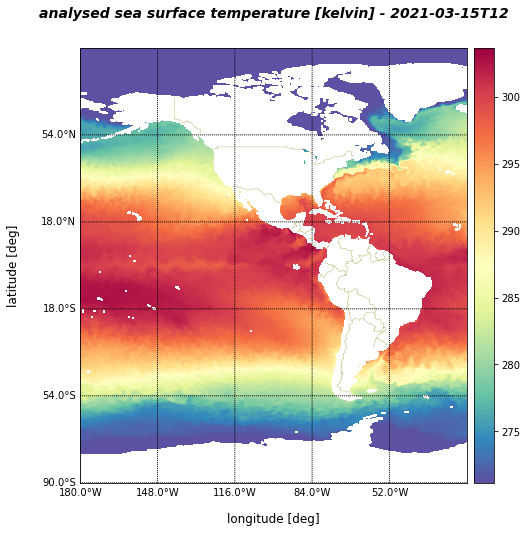

In [26]:
# Plot configuration
width_inch = 16
height_inch = 8

# Map configuration
map_config = { 
#     "projection": "merc",
    "llcrnrlat": lat_min,
    "llcrnrlon": lon_min,
    "urcrnrlat": lat_max,
    "urcrnrlon": lon_max,
    "resolution": 'i',
    "epsg": 4326
}

# Axes labels
fontsize = 14
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'
xlabelpad = 30
ylabelpad = 60

# Colorbar configuration
cmap = "Spectral_r"
cbar_position = "right"

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

label_fontstyle = {
    "fontsize": "12",
    "labelpad": 30
}

# Set the coordinates indexes
lat_indexes = getRangeIndexes(lats, lat_min, lat_max)
lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
time_indexes = getRangeIndexes(times, start_date, end_date)

# Get the selected coordinates:
lats_sel = lats[lat_indexes]
lons_sel = lons[lon_indexes]

# Get the timestep
timestep = np.datetime_as_string(plot_date,'h')

# Get the data
data = var_sel[time_indexes[0], lat_indexes, lon_indexes]

# Initialise the figure
plt.figure(figsize=(width_inch, height_inch))
map = Basemap(**map_config)

## imshow the data
min_value = data.min() if min_value is None else min_value
max_value = data.max() if max_value is None else max_value

# # imshow with linear range
imshow= map.imshow(data, vmin=min_value, vmax=max_value, cmap=cmap)

# imshow with log range
# min fixed 
#min_value=0.1
#imshow= map.imshow(data, vmin=min_value, vmax=max_value, cmap=cmap, norm=LogNorm())

## draw meridians and parallels
step_lat = float((lat_max - lat_min) / 5)
step_lon = float((lon_max - lon_min) / 5)
parallels = np.arange(lat_min, lat_max, step_lat)
meridians = np.arange(lon_min, lon_max, step_lon) 
map.drawmeridians(meridians, labels=[0,0,0,1], fmt="%2.1f")
map.drawparallels(parallels, labels=[1,0,0,0], fmt="%2.1f")

## draw colorbar
map.colorbar(imshow, cbar_position)

## draw countries...
map.drawcountries(linewidth=0.25, color='olive')

# set title
title_sel = data.long_name
var_str = "{} [{}]".format(title_sel, data.units)
title = ' - '.join((var_str, timestep))
    
## draw title and axes labels
plt.title(title, **title_fontstyle)
plt.xlabel(xlabel, labelpad=xlabelpad, fontsize=12)
plt.ylabel(ylabel, labelpad=ylabelpad, fontsize=12)    
    
# output file
output_file = os.path.join(out_path,title.translate(str.maketrans(' ,','__'))) + ".png"

# save the output file
plt.savefig(output_file)
plt.show()
plt.close()

If you can't see easily the maps, you can disable the scrolling. 
Choose the previous cell (the one with the maps), then select in the menu: **Cell &rarr; Current Output &rarr; Toggle Scrolling**

<div class="alert alert-block alert-warning">

### LET'S TRY: Change the plot!

If you want, you can change the above plot.

For example, you could:
- change the area
- change the min/max values for the chosen variable
- change the variable to compare sea ice concentration to the SST


***

# 4.2. Exercise 2: Plot of time series
[Go back to the "Table of contents"](#Table-of-contents)

In this exercise we will see how to plot the time series of sea surface temperature for two locations.
The first is located in the Indian Ocean, the second in the Pacific Ocean.

## 4.2.1. Import the modules and get set up

Before going on, since we are in Jupyter Notebook, we need to set the environment in order to properly load some of the required libraries. 

In [27]:
import os

In case you get an error in the following steps, try setting the variable os.environ\['PROJ_LIB\] to the shared path of your conda environment. For example by executing in a python cell (don't forget to replace <PATH_TO_ANACONDA> with the proper values):

os.environ\['PROJ_LIB'\] = "<PATH_TO_ANACONDA\>/share/proj"

To avoid the warning messages during the execution and installation process, at first remove them:

In [28]:
import warnings
warnings.filterwarnings('ignore')
#os.environ['PROJ_LIB'] = "<PATH_TO_ANACONDA>/share/proj"  #uncomment this replacing <PATH_TO_ANACONDA> with proper value if needed

In [29]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime
import pandas as pd
import matplotlib.dates as mdates

*Don't change the following constants, which define the training and the notebook codes*:

In [30]:
REGION_CODE = "10"
NB_CODE = "01"

**checkDir**: function for creating a path, if needed

In [31]:
def checkDir(outPath):
    if not os.path.exists(outPath):
        os.makedirs(outPath)

**getRangeIndexes**: function for getting the indexes of the array *arr* between the *var_min* and *var_max* values:

In [32]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

Set the paths:

In [33]:
# Path for netcdf files
data_path = './data'

# Path for the output files (images, etc)
out_path = './out/'+REGION_CODE+'-'+NB_CODE

## 4.2.2. Access the data
[Go back to the "Table of contents"](#Table-of-contents)

In [34]:
# Input netcdf file
sst_f = "10-01-B.nc"
 
# Build the complete nc path
sst_nc = os.path.join(data_path, sst_f)

In [35]:
# Open the nc datasets
sst_ds = xr.open_dataset(sst_nc)

### Get info about the datasets:

In [36]:
sst_ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:       (lat: 720, lon: 640, time: 120)
Coordinates:
  * time          (time) datetime64[ns] 2021-03-15T00:30:00 ... 2021-03-19T23...
  * lat           (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 -179.9 -179.6 -179.4 ... -20.62 -20.38 -20.12
Data variables:
    analysed_sst  (time, lat, lon) float32 ...
Attributes: (12/52)
    Conventions:                CF-1.4
    title:                      Global Diurnal Skin SST Analysis, L4 OSTIA, 0...
    summary:                    A merged, multi-sensor L4 skin SST product
    references:                 While J., Martin M.; 2013;  Development of a ...
    institution:                UKMO
    history:                    See source and creation_date attributees
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         -

## 4.2.3. Set the configuration
[Go back to the "Table of contents"](#Table-of-contents)

In [37]:
# Set the variable names (used later for accessing the data)
lon_name = "lon"
lat_name= "lat"
time_name = "time"
sst_name = "analysed_sst"

## 4.2.4. Plot the time series
[Go back to the "Table of contents"](#Table-of-contents)

### Choose the points of interest:

In [38]:
# Set the points of interest

point1 = {'x': -30.125, 'y': 0.125}
point2 = {'x': -120.125, 'y': 0.125}

### Extract the dataset for the selected points:

In [39]:
# Extract the sub-dataset for the first defined point
ds_sel1 = sst_ds.sel(lat=point1['y'], lon=point1['x'], method='nearest')
ds_sel1

<xarray.Dataset>
Dimensions:       (time: 120)
Coordinates:
  * time          (time) datetime64[ns] 2021-03-15T00:30:00 ... 2021-03-19T23...
    lat           float32 0.125
    lon           float32 -30.12
Data variables:
    analysed_sst  (time) float32 ...
Attributes: (12/52)
    Conventions:                CF-1.4
    title:                      Global Diurnal Skin SST Analysis, L4 OSTIA, 0...
    summary:                    A merged, multi-sensor L4 skin SST product
    references:                 While J., Martin M.; 2013;  Development of a ...
    institution:                UKMO
    history:                    See source and creation_date attributees
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         -89.875
    geospatial_lat_max:         89.875
    geospatial_lon_min:         -179.875
    geospatial_lon_max:         -20.125

In [40]:
# Extract the sub-dataset for the second defined point
ds_sel2 = sst_ds.sel(lat=point2['y'], lon=point2['x'], method='nearest')
ds_sel2

<xarray.Dataset>
Dimensions:       (time: 120)
Coordinates:
  * time          (time) datetime64[ns] 2021-03-15T00:30:00 ... 2021-03-19T23...
    lat           float32 0.125
    lon           float32 -120.1
Data variables:
    analysed_sst  (time) float32 ...
Attributes: (12/52)
    Conventions:                CF-1.4
    title:                      Global Diurnal Skin SST Analysis, L4 OSTIA, 0...
    summary:                    A merged, multi-sensor L4 skin SST product
    references:                 While J., Martin M.; 2013;  Development of a ...
    institution:                UKMO
    history:                    See source and creation_date attributees
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         -89.875
    geospatial_lat_max:         89.875
    geospatial_lon_min:         -179.875
    geospatial_lon_max:         -20.125

### Extract the SST values for the selected timeseries:

In [41]:
# Extract the SST values for the first point
sst_sel1 = ds_sel1[sst_name].round(2)
sst_sel1

<xarray.DataArray 'analysed_sst' (time: 120)>
array([300.67, 300.66, 300.66, 300.65, 300.65, 300.64, 300.63, 300.62,
       300.62, 300.63, 300.68, 300.75, 300.87, 301.04, 301.17, 301.24,
       301.29, 301.26, 301.1 , 300.8 , 300.66, 300.65, 300.65, 300.66,
       300.93, 300.93, 300.92, 300.92, 300.92, 300.92, 300.92, 300.92,
       300.92, 300.92, 300.94, 301.  , 301.09, 301.23, 301.39, 301.5 ,
       301.58, 301.57, 301.45, 301.2 , 300.95, 300.94, 300.94, 300.93,
       301.06, 301.05, 301.05, 301.05, 301.05, 301.04, 301.04, 301.03,
       301.04, 301.04, 301.06, 301.1 , 301.19, 301.36, 301.55, 301.69,
       301.78, 301.73, 301.51, 301.21, 301.08, 301.08, 301.08, 301.07,
       300.98, 300.99, 300.98, 300.97, 300.97, 300.97, 300.97, 300.97,
       300.97, 300.97, 300.98, 301.02, 301.06, 301.11, 301.16, 301.16,
       301.13, 301.07, 301.  , 300.97, 300.97, 300.97, 300.97, 300.98,
       300.97, 300.96, 300.95, 300.95, 300.95, 300.95, 300.94, 300.94,
       300.94, 300.94, 300.94, 300.97, 301.03, 301.15, 301.29, 301.39,
       301.41, 301.37, 301.21, 301.  , 300.95, 300.94, 300.93, 300.94],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-03-15T00:30:00 ... 2021-03-19T23:30:00
    lat      float32 0.125
    lon      float32 -30.12
Attributes:
    long_name:      analysed sea surface skin temperature
    standard_name:  sea_surface_skin_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         NAVO-L2P-AVHRR19_G, OSPO-L2P-GOES15, SEVIRI_SST-OSISAF-L3...
    reference:      N/A
    comment:         Hourly averaged OSTIA skin SST
    _ChunkSizes:    [  8 240 480]

In [42]:
# Extract the SST values for the second point
sst_sel2 = ds_sel2[sst_name].round(2)
sst_sel2

<xarray.DataArray 'analysed_sst' (time: 120)>
array([299.93, 299.61, 299.16, 298.92, 298.91, 298.91, 298.92, 298.92,
       298.91, 298.91, 298.91, 298.9 , 298.89, 298.89, 298.89, 298.93,
       299.01, 299.1 , 299.22, 299.4 , 299.54, 299.61, 299.64, 299.6 ,
       299.  , 298.8 , 298.55, 298.43, 298.41, 298.41, 298.42, 298.42,
       298.42, 298.41, 298.4 , 298.4 , 298.39, 298.38, 298.39, 298.45,
       298.57, 298.73, 298.93, 299.17, 299.34, 299.37, 299.36, 299.33,
       299.09, 298.78, 298.45, 298.28, 298.27, 298.27, 298.28, 298.29,
       298.29, 298.29, 298.29, 298.29, 298.3 , 298.3 , 298.31, 298.35,
       298.42, 298.51, 298.62, 298.73, 298.78, 298.75, 298.7 , 298.59,
       298.1 , 297.98, 297.93, 297.92, 297.91, 297.91, 297.91, 297.91,
       297.91, 297.9 , 297.9 , 297.89, 297.89, 297.88, 297.89, 297.91,
       297.94, 297.97, 298.04, 298.16, 298.27, 298.35, 298.44, 298.48,
       298.08, 297.8 , 297.72, 297.71, 297.7 , 297.7 , 297.68, 297.67,
       297.67, 297.66, 297.66, 297.66, 297.66, 297.67, 297.68, 297.74,
       297.86, 298.01, 298.17, 298.33, 298.48, 298.57, 298.6 , 298.56],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-03-15T00:30:00 ... 2021-03-19T23:30:00
    lat      float32 0.125
    lon      float32 -120.1
Attributes:
    long_name:      analysed sea surface skin temperature
    standard_name:  sea_surface_skin_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         NAVO-L2P-AVHRR19_G, OSPO-L2P-GOES15, SEVIRI_SST-OSISAF-L3...
    reference:      N/A
    comment:         Hourly averaged OSTIA skin SST
    _ChunkSizes:    [  8 240 480]

### Convert the two datasets into a pandas DataFrame

In [43]:
# define two labels
fname1 = "SST (%s, %s)" % (point1["x"], point1["y"])
fname2 = "SST (%s, %s)" % (point2["x"], point2["y"])

# create dates np.array for the x axis
dates=[]
for i in range(len(sst_sel1.time.values)) : 
    dates.append(np.datetime64(sst_sel1.time.values[i]))
dates= np.array(dates)   

# create a dataframe with data of the first and second points
df = pd.DataFrame({"Dates": dates, 
                    fname1: sst_sel1,
                    fname2: sst_sel2})
# and let’s set the Dates as the DataFrame’s index.
df = df.set_index('Dates')

### Have a look at the data

In [44]:
## print just a section of this dataframe
df[100:200:1]

,"SST (-30.125, 0.125)","SST (-120.125, 0.125)"
Dates,,
2021-03-19 04:30:00,300.950012,297.700012
2021-03-19 05:30:00,300.950012,297.700012
2021-03-19 06:30:00,300.940002,297.679993
2021-03-19 07:30:00,300.940002,297.670013
2021-03-19 08:30:00,300.940002,297.670013
2021-03-19 09:30:00,300.940002,297.660004
2021-03-19 10:30:00,300.940002,297.660004
2021-03-19 11:30:00,300.970001,297.660004
2021-03-19 12:30:00,301.029999,297.660004


In [45]:
# print some summary statitics 
df.describe()

,"SST (-30.125, 0.125)","SST (-120.125, 0.125)"
count,120.000000,120.000000
mean,301.028503,298.448090
std,0.238650,0.540920
min,300.619995,297.660004
25%,300.937500,297.937500
50%,300.975006,298.404999
75%,301.100006,298.890015
max,301.779999,299.929993


### Compute daily averages

In [46]:
# To compute averages we will use the DataFrame’s resample() method
# this splits the DatetimeIndex into time bins and groups the data by time bin
# Resample to daily frequency, aggregating with mean.
df_mean = df.resample("D").mean()

# Change the times associated with the means to be the centre of the bins
# rather than the left.
from pandas.tseries.frequencies import to_offset
df_mean.index += to_offset('12H')

# Print out the result. 
df_mean

,"SST (-30.125, 0.125)","SST (-120.125, 0.125)"
Dates,,
2021-03-15 12:00:00,300.802094,299.151245
2021-03-16 12:00:00,301.080414,298.686676
2021-03-17 12:00:00,301.205841,298.467926
2021-03-18 12:00:00,301.012085,298.016266
2021-03-19 12:00:00,301.042084,297.918335


### Save the data in csv file format

In [47]:
# save the dataframe to a csv file
fname_table = "sst_data.csv"
output_table =  os.path.join(out_path, fname_table)
df.to_csv(output_table)

# ...then verify if the file exists
if os.path.isfile(output_table):
    print(output_table)

./out/10-01/sst_data.csv


### Plot

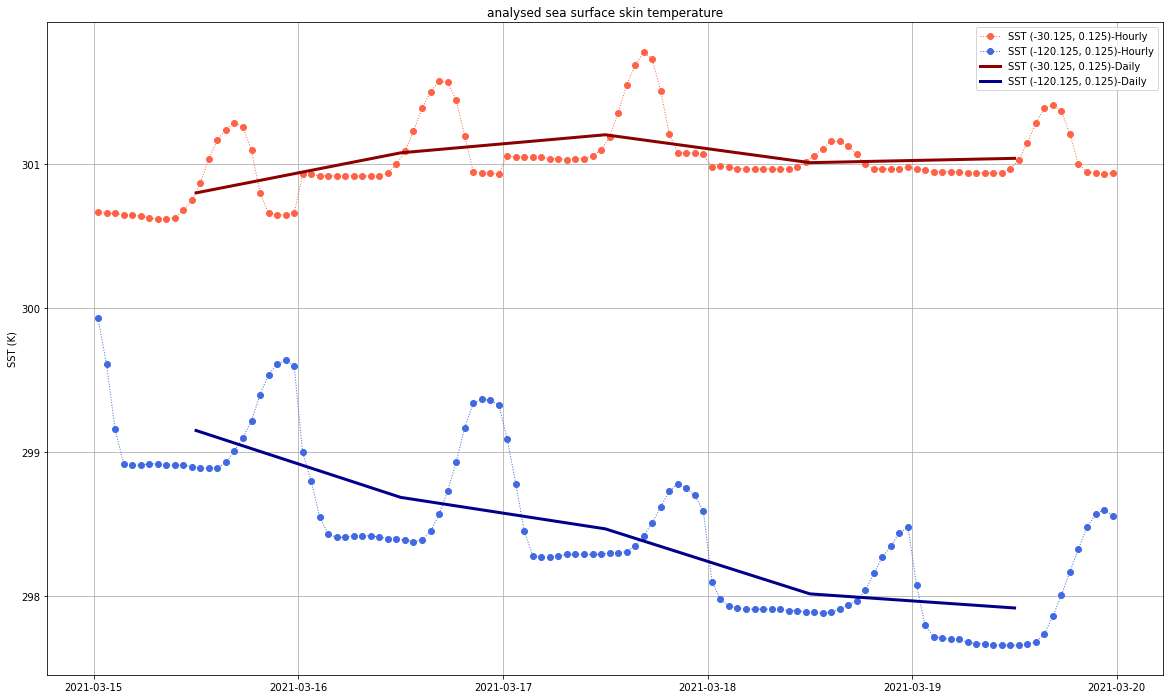

In [48]:
# We will use the location in the panda data frame to define the x-range

# prepare the plot 
fig, ax = plt.subplots(figsize=(20,12))

# plot the first column of the pandas dataframe for the hourly times series 
ax.plot(df.loc[:, fname1],
        linestyle=':', lw=1, 
        marker='o' ,color="tomato",label=fname1+'-Hourly')

# add to the plot the second column of the pandas dataframe
ax.plot(df.loc[:, fname2],
        linestyle=':', lw=1, 
        marker='o',  color="royalblue",label=fname2+'-Hourly')

 
# now plot also the daily averages
# add a # before the """ at the start and botton of this section to uncomment it
#"""
ax.plot(df_mean.loc[:, fname1],
        linestyle='-', lw=3, color="darkred",label=fname1+'-Daily')
ax.plot(df_mean.loc[:, fname2],
        linestyle='-', lw=3,color="darkblue",label=fname2+'-Daily')
#"""

# format the x axis ticks
days = mdates.DayLocator()  # every month
ax.xaxis.set_major_locator(days)
#plot.set_xlim(datemin, datemax)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# format the y axis and ticks 
ax.set_ylabel('SST (K)')
# set the Y on LOG: COMMENT FOR LINEAR RANGE
#ax.set_yscale("log")
#ax.set_yticks([0.1,1,10])
#ax.set_yticklabels(["0.1","1","10"])

# set the grid
ax.grid(True)

# set the legend
ax.legend();

# set title
title = ds_sel1[sst_name].long_name
ax.set_title(title);

# output file
output_file = os.path.join(out_path,ds_sel1[sst_name].long_name.replace(' ','_')) + ".png"

# save the output file
plt.savefig(output_file)

# plot!
plt.show()

<div class="alert alert-block alert-warning">

### LET'S TRY: Change the plot!

If you want, you can change the above plot.

For example, you could:
- change the locations being plotted    
- download a longer time series (you might want to restrict the size of the region to keep the file size reasonable) and examine how the SST changes over a month or more
- find and plot the daily minimums and maximums

    
Go back to [Configure the variables for the plots](#4.2.4.-Plot-the-time-series) and then re-execute the cell for generating the plot. Try!



***

# 5. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### And thank you for your attention! :) We hope you enjoyed this training on the Mediterranean Sea Surface Temperature data provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### Now let's try to download new data and variables and to access and visualize them... you can try to make new maps and plots... and don't forget to try to the other [Copernicus Marine products](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&task=results)

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 

We do thank you in advance for your kind collaboration :)